In [36]:
#!pip uninstall tensorflow

In [37]:
#!pip uninstall keras

In [38]:
!pip install tensorflow==2.2.0
!pip install keras==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/train'

In [42]:

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [43]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [44]:
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [45]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)
x = Dense(256, activation="relu") (x)
x = Dense(256, activation="relu") (x)
x = Dense(256, activation="relu") (x)

In [46]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [47]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [48]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [49]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4117 images belonging to 6 classes.


In [51]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1375 images belonging to 6 classes.


In [52]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
129/129 [==============================] - 97s 754ms/step - loss: 1.4123 - accuracy: 0.4649 - val_loss: 1.1655 - val_accuracy: 0.5702
Epoch 2/10
129/129 [==============================] - 83s 642ms/step - loss: 0.9228 - accuracy: 0.6592 - val_loss: 1.0753 - val_accuracy: 0.5869
Epoch 3/10
129/129 [==============================] - 81s 631ms/step - loss: 0.7888 - accuracy: 0.7153 - val_loss: 0.8755 - val_accuracy: 0.6764
Epoch 4/10
129/129 [==============================] - 81s 626ms/step - loss: 0.6773 - accuracy: 0.7573 - val_loss: 0.8758 - val_accuracy: 0.6916
Epoch 5/10
129/129 [==============================] - 80s 622ms/step - loss: 0.5575 - accuracy: 0.8042 - val_loss: 0.9327 - val_accuracy: 0.6858
Epoch 6/10
129/129 [==============================] - 80s 620ms/step - loss: 0.5083 - accuracy: 0.8263 - val_loss: 0.9628 - val_accuracy: 0.6720
Epoch 7/10
129/129 [==============================] - 80s 618ms/step - loss: 0.4434 - accuracy: 0.8528 - val_loss: 0.9822 - val_ac

In [53]:
import matplotlib.pyplot as plt


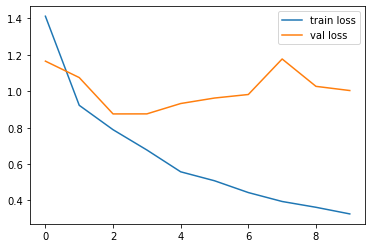

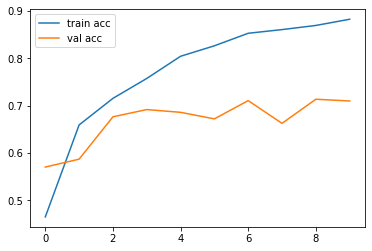

<Figure size 432x288 with 0 Axes>

In [54]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [55]:

from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [56]:
y_pred = model.predict(test_set)

In [57]:
y_pred

array([[1.62462857e-05, 3.21614643e-04, 9.98061836e-01, 1.92572497e-06,
        9.15623957e-07, 1.59748667e-03],
       [8.50163906e-06, 4.35841088e-07, 3.93832806e-06, 1.51562374e-04,
        4.90905632e-06, 9.99830604e-01],
       [8.22617933e-02, 5.48535632e-03, 2.52687000e-02, 1.03282863e-02,
        8.76548707e-01, 1.07166168e-04],
       ...,
       [1.25046610e-03, 6.23384025e-03, 9.88781393e-01, 9.29491653e-05,
        5.01085196e-05, 3.59117822e-03],
       [2.36844335e-06, 1.14739036e-04, 9.99882698e-01, 3.02603951e-08,
        2.01620001e-08, 1.62491858e-07],
       [3.20631443e-07, 7.42903765e-08, 9.99994993e-01, 1.31473229e-07,
        4.68471825e-07, 4.01397301e-06]], dtype=float32)

In [58]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [59]:
y_pred

array([2, 5, 4, ..., 2, 2, 2])